# (sFigure10)-The Developmental Trajectories of CD8+ MAIT Cells.

In [2]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.9, Tutorials: https://omicverse.readthedocs.io/


In [3]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [4]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]
adata_CD8

AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

<AxesSubplot: title={'center': 'Subcelltype'}, xlabel='X_umap1', ylabel='X_umap2'>

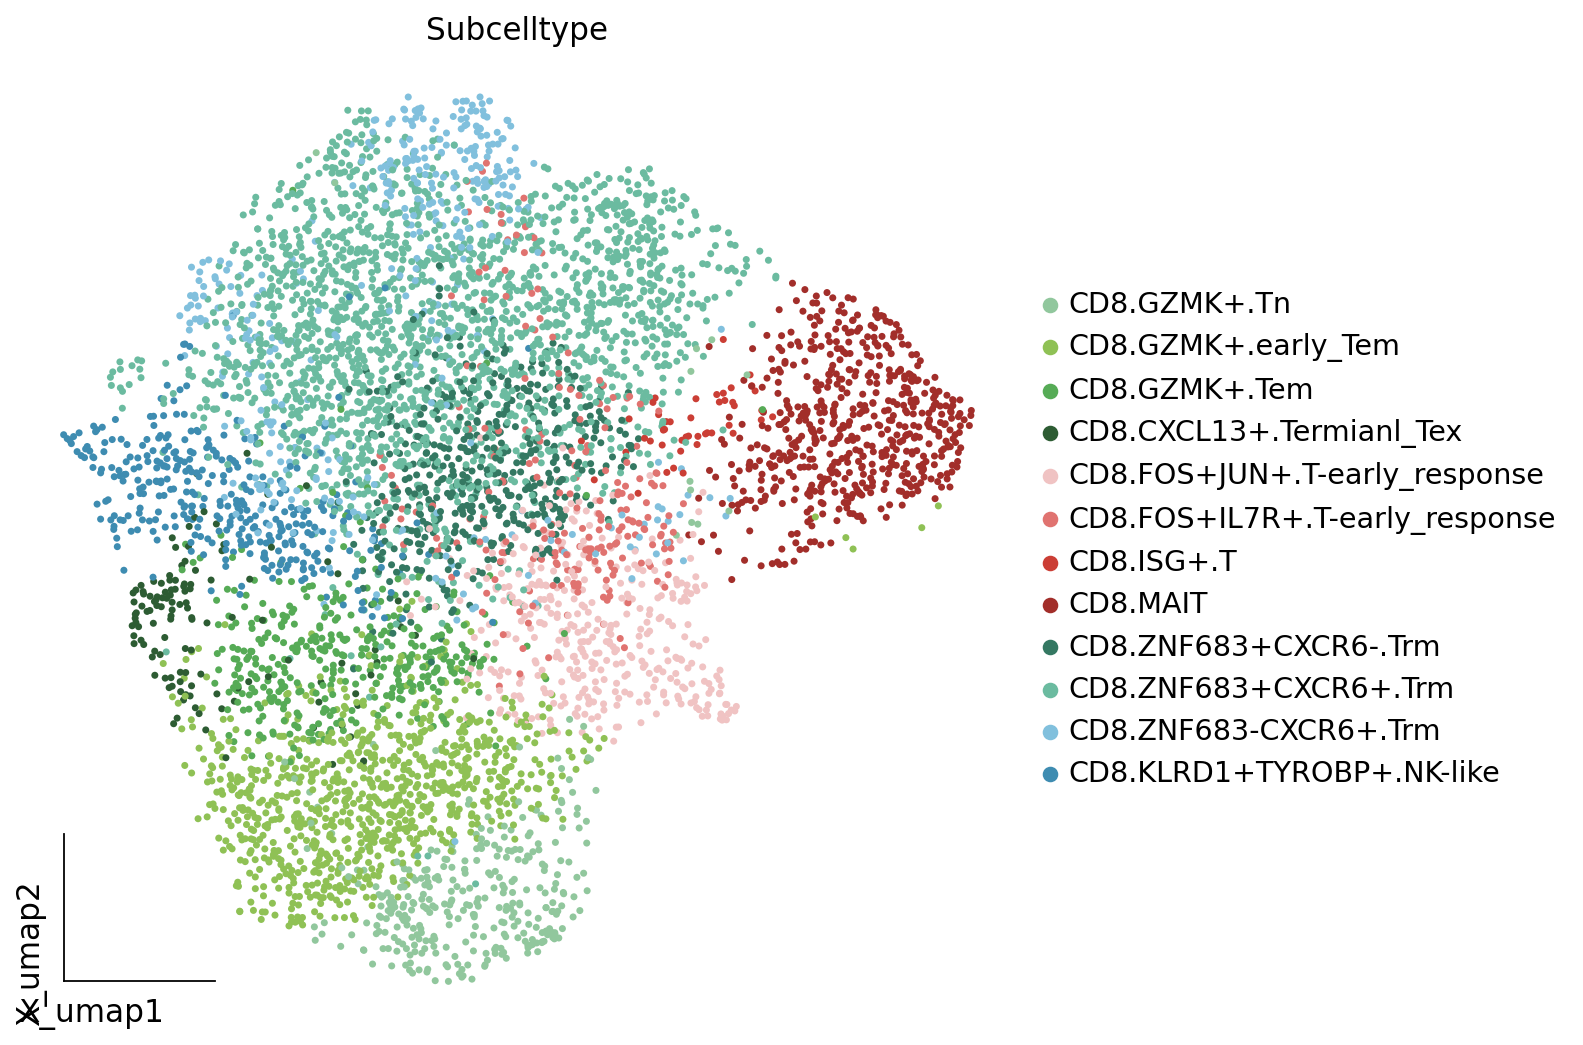

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
ov.utils.embedding(adata_CD8,
                basis='X_umap',frameon='small',
                color=['Subcelltype'],show=False,ax=ax,size=40)

In [6]:
adata_CD8.obs['clusters'] = adata_CD8.obs['Subcelltype']
Traj=ov.single.TrajInfer(adata_CD8,basis='X_umap',use_rep='X_scVI',n_comps=10)
Traj.set_origin_cells('CD8.GZMK+.Tn')
Traj.inference(method='diffusion_map')

computing neighbors


2024-04-12 00:13:39.954673: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-12 00:13:48.912878: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-12 00:14:23.214939: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:/opt/slurm/lib/slurm:/opt/slurm/lib:

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:42)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9602898  0.9591224  0.93890196 0.9296711  0.92271674
     0.91347533 0.9047069  0.90049803 0.8954998  0.89141953 0.8870985
     0.8864504  0.8821082  0.8775621 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:38)
computing Diffusion Pseudotime using n_d

running PAGA using priors: ['dpt_pseudotime']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


[rank: 0] Global seed set to 0


<AxesSubplot: title={'center': 'PAGA LTNN-graph'}>

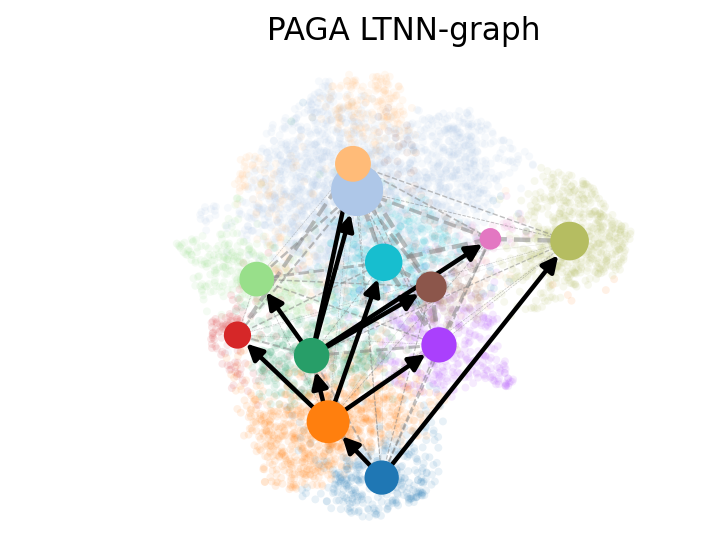

In [7]:
ov.utils.cal_paga(adata_CD8,use_time_prior='dpt_pseudotime',vkey='paga',
                 groups='clusters')
ov.utils.plot_paga(adata_CD8,basis='umap', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)

In [8]:
adata_CD8.uns['paga_graph']

<6184x6184 sparse matrix of type '<class 'numpy.float32'>'
	with 124648 stored elements in Compressed Sparse Row format>

In [9]:
pd.DataFrame(adata_CD8.uns['paga']['transitions_confidence'].todense())

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.086565,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.070632,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.044700,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.033633,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.000000,0.017310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.000000,0.010026,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.025332,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.018029,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.000000,0.042452,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
set(adata_CD8.obs['Subcelltype'])

{'CD8.CXCL13+.Termianl_Tex',
 'CD8.FOS+IL7R+.T-early_response',
 'CD8.FOS+JUN+.T-early_response',
 'CD8.GZMK+.Tem',
 'CD8.GZMK+.Tn',
 'CD8.GZMK+.early_Tem',
 'CD8.ISG+.T',
 'CD8.KLRD1+TYROBP+.NK-like',
 'CD8.MAIT',
 'CD8.ZNF683+CXCR6+.Trm',
 'CD8.ZNF683+CXCR6-.Trm',
 'CD8.ZNF683-CXCR6+.Trm'}

In [11]:
adata_CD8_part = adata_CD8[adata_CD8.obs['Subcelltype'].isin(['CD8.GZMK+.Tn','CD8.MAIT'])]
sc.pp.neighbors(adata_CD8_part, use_rep="X_scVI", metric="cosine",n_neighbors=15, random_state = 112)
sc.tl.leiden(adata_CD8_part,resolution=1.5)
sc.tl.paga(adata_CD8_part)
sc.pl.paga(adata_CD8_part, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_CD8_part,init_pos='paga')
adata_CD8_part

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)
running Leiden clustering
    finished: found 15 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:02)


AnnData object with n_obs × n_vars = 902 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'clusters', 'dpt_pseudotime'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'diffmap_evals', 'draw_graph', 'iroot', 'paga_graph', 'clusters_sizes', 'clusters_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', 'X_diffmap', 'X_draw_graph_fr'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

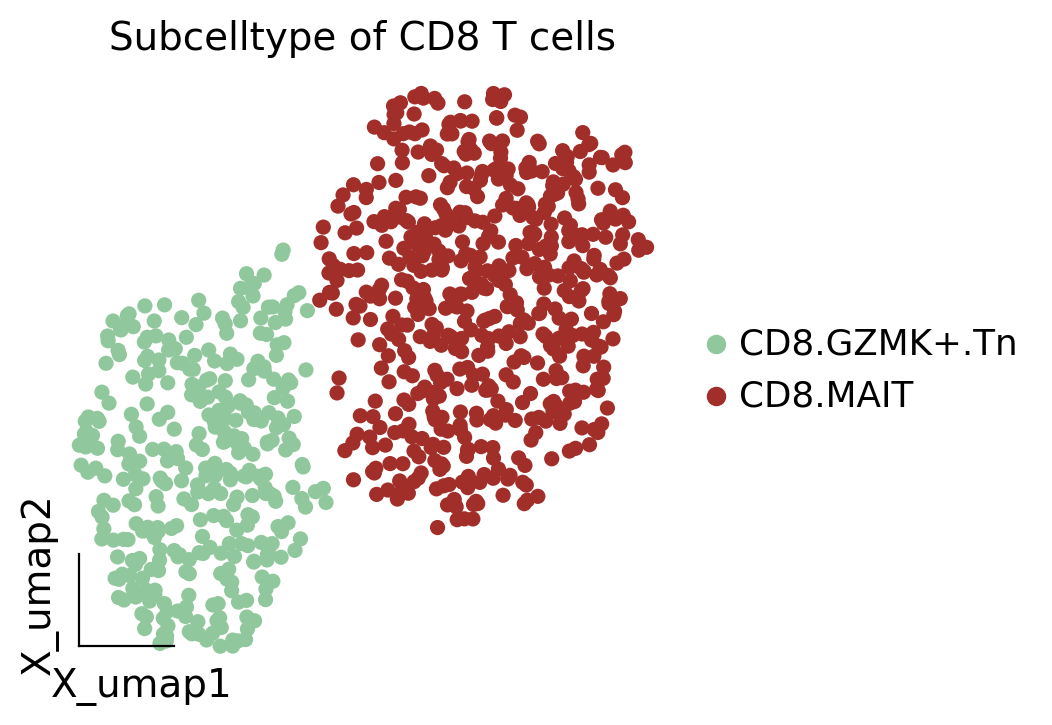

In [44]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(adata_CD8_part,
                basis='X_umap',frameon='small',title='Subcelltype of CD8 T cells',
                color=['Subcelltype'],show=False,ax=ax,size=120)
plt.savefig("Gastric/Figure/sFigure10/sFigure10_A.png",dpi=300,bbox_inches = 'tight')

In [13]:
v0 = ov.single.pyVIA(adata=adata_CD8_part,adata_key='X_scVI',adata_ncomps=80, basis='X_umap',too_big_factor=1,small_pop=50, #new parameter
                    resolution_parameter=0.4,clusters='Subcelltype',knn=30,random_seed=4,root_user=['CD8.GZMK+.Tn'],)
v0.run()


v0.get_pseudotime()
adata_CD8_part

2024-04-12 00:16:47.731683	Running VIA over input data of 902 (samples) x 10 (features)
2024-04-12 00:16:47.731862	Knngraph has 30 neighbors
2024-04-12 00:16:48.034084	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 49.2 % of edges. 
2024-04-12 00:16:48.038394	Number of connected components used for clustergraph  is 1
2024-04-12 00:16:48.072561	Commencing community detection
2024-04-12 00:16:48.141363	Finished running Leiden algorithm. Found 8 clusters.
2024-04-12 00:16:48.142042	Merging 2 very small clusters (<50)
2024-04-12 00:16:48.142267	Finished detecting communities. Found 6 communities
2024-04-12 00:16:48.142335	Making cluster graph. Global cluster graph pruning level: 0.15
2024-04-12 00:16:48.144725	Graph has 1 connected components before pruning
2024-04-12 00:16:48.145685	Graph has 1 connected components after pruning
2024-04-12 00:16:48.145816	Graph has 1 connected components after reconnecting
2024-04-12 00:16:48.146201	0.0% links trimmed f

AnnData object with n_obs × n_vars = 902 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'clusters', 'dpt_pseudotime', 'pt_via'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'diffmap_evals', 'draw_graph', 'iroot', 'paga_graph', 'clusters_sizes', 'clusters_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', 'X_diffmap', 'X_draw_graph_fr'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:000:00


2024-04-12 13:51:54.678890	Super cluster 5 is a super terminal with sub_terminal cluster 5


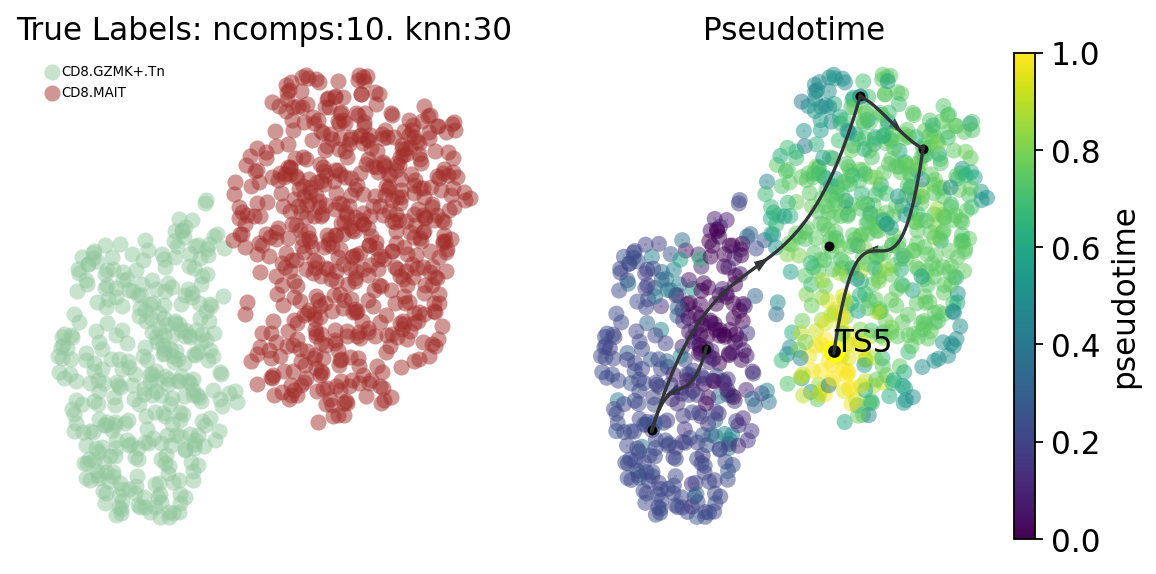

In [43]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Subcelltype',draw_all_curves=False,cmap_pseudotime ='viridis')
fig.savefig("Gastric/Figure/sFigure10/sFigure10_B.png",dpi=300,bbox_inches = 'tight')

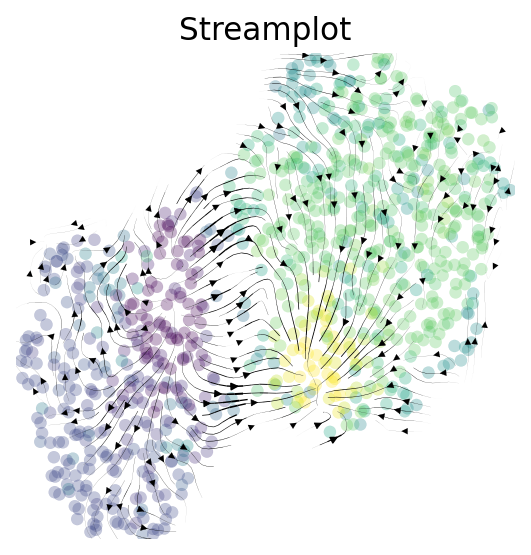

In [42]:
fig,ax=v0.plot_stream(basis='X_umap',density_grid=0.8, scatter_size=30, color_scheme='time', linewidth=0.5,
                             min_mass = 1, cutoff_perc = 5, scatter_alpha=0.3, marker_edgewidth=0.1,cmap_str='viridis',
                             density_stream = 2, smooth_transition=1, smooth_grid=0.5)
fig.savefig("Gastric/Figure/sFigure10/sFigure10_C.png",dpi=300,bbox_inches = 'tight')

shape of transition matrix raised to power 3 (902, 902)


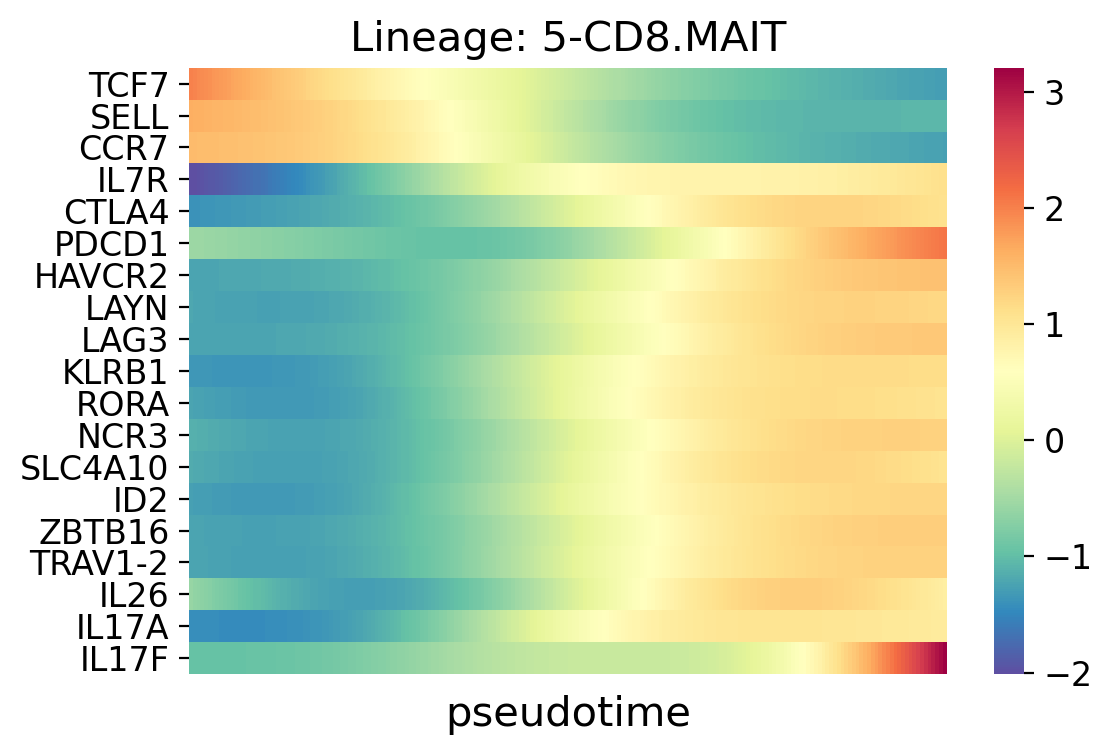

In [46]:
v0.adata = adata_CD8_part.raw.to_adata()
gene_list_magic = ['TCF7','SELL','CCR7','IL7R','CTLA4','PDCD1','HAVCR2','LAYN','LAG3','KLRB1','RORA','NCR3','SLC4A10','ID2',
                   'ZBTB16','TRAV1-2','IL26','IL17A','IL17F',]
fig,ax=v0.plot_gene_trend_heatmap(gene_list=gene_list_magic,figsize=(6,4),fontsize=12,cmap='Spectral_r',
                          marker_lineages=[5])
fig.savefig("Gastric/Figure/sFigure10/sFigure10_D.png",dpi=300,bbox_inches = 'tight')

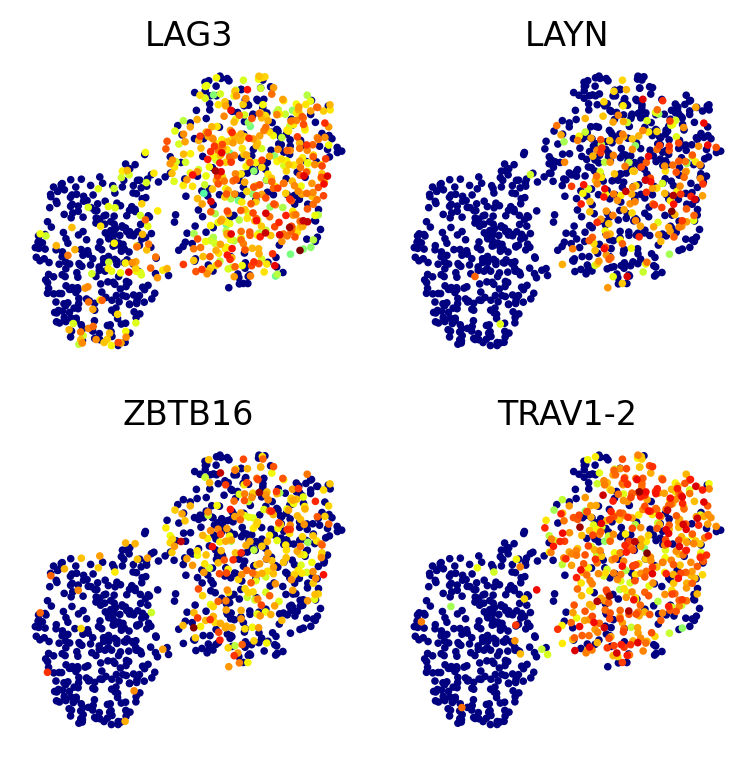

In [61]:
import matplotlib.pyplot as plt
import matplotlib as mpl
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(4,4), sharex=True, sharey=True)
all_genes=['LAG3','LAYN','ZBTB16','TRAV1-2']
for i, row_axes in enumerate(axes):
    for j, ax in enumerate(row_axes):
        axes = ov.utils.embedding(adata,
                               basis='X_umap',
                               color=all_genes[i * 2 + j],
                               title=all_genes[i * 2 + j],
                               frameon=False,
                               show=False,
                               legend_loc=False,
                               color_map = mpl.cm.get_cmap('jet'),
                               colorbar_loc=None,
                               legend_fontsize=18,size=30,
                               ax=ax)
        axes.set_title(all_genes[i * 2 + j],fontdict={'size':12})

plt.tight_layout()
plt.savefig("Gastric/Figure/sFigure10/sFigure10_E.png",dpi=300,bbox_inches = 'tight')
plt.show()


In [19]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')
adata_raw = adata_raw[adata_CD8_part.obs.index]
adata_raw.obs = adata_CD8_part.obs
adata_raw.uns = adata_CD8_part.uns
adata_raw.obsm = adata_CD8_part.obsm

adata = adata_raw
adata = adata[:,~adata.var_names.str.contains('RPS')]
adata = adata[:,~adata.var_names.str.contains('RPL')]
#normalize and high variable genes (HVGs) calculated
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,)

#save the whole genes and filter the non-HVGs
adata.raw = adata
adata = adata[:, adata.var.highly_variable_features]

adata.layers['lognorm'] = adata.X
adata

Begin robust gene identification
After filtration, 18089/32115 genes are kept. Among 18089 genes, 18089 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 902 × 3000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype', 'clusters', 'dpt_pseudotime', 'pt_via', 'SEACell'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap', 'diffmap_evals', 'draw_graph', 'iroot', 'paga_graph', 'clusters_sizes', 'clusters_colors', 'log1p', 'hvg'
    obsm: 'X_pca', 'X_scVI', 'X_umap', 'X_diffmap', 'X_draw_graph_fr'
    layers: 'counts', 'lognorm'
    obsp: 'connectivities', 'distances'

In [21]:
set(adata.obs['Subcelltype'])

{'CD8.GZMK+.Tn', 'CD8.MAIT'}

In [27]:
dds=ov.bulk.pyDEG(adata.to_df().T)
dds.drop_duplicates_index()
print('... drop_duplicates_index success')
treatment_groups=adata.obs[adata.obs['Subcelltype']=='CD8.MAIT'].index.tolist()
control_groups=adata.obs[adata.obs['Subcelltype']=='CD8.GZMK+.Tn'].index.tolist()
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=0,
                   pval_threshold=0.01,
                   logp_max=50)


... drop_duplicates_index success
... Fold change threshold: 0


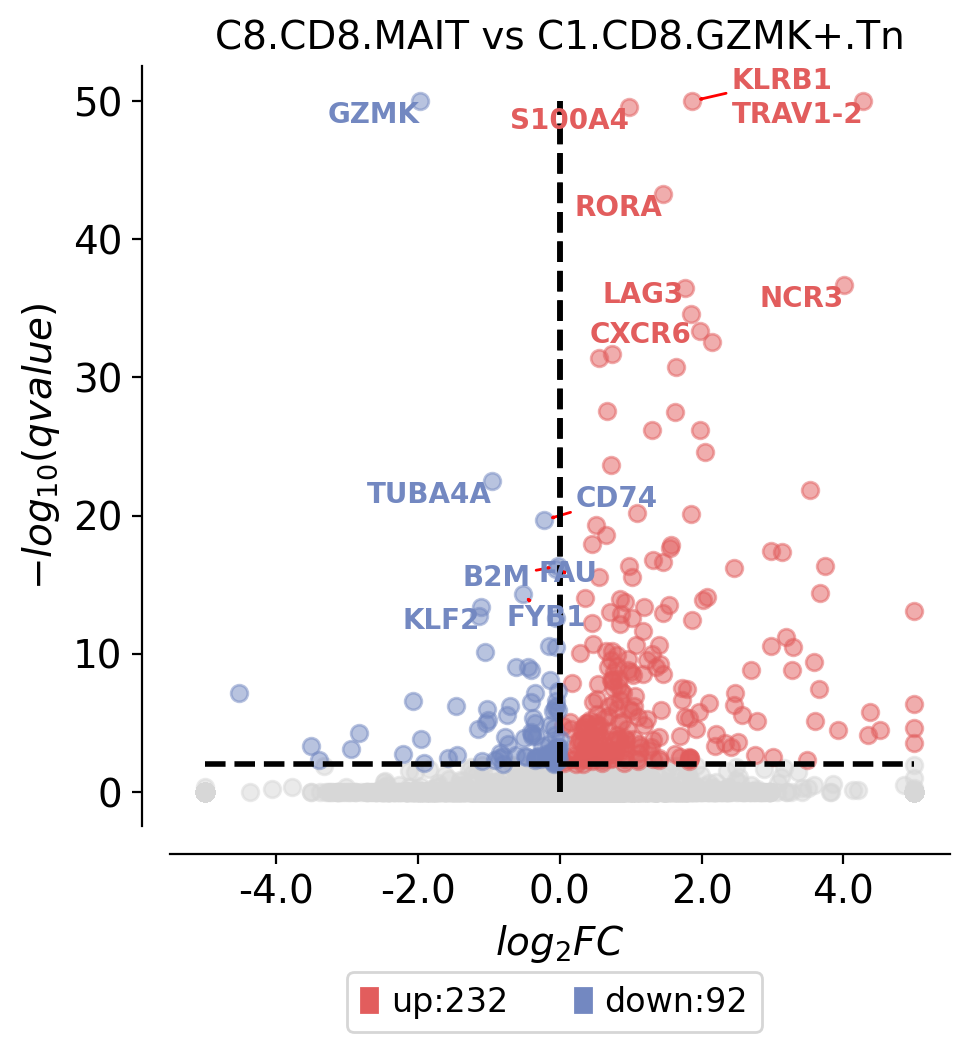

In [51]:
dds.result.loc[dds.result['log2FC']>5,'log2FC'] = 5
dds.result.loc[dds.result['log2FC']<-5,'log2FC'] = -5
#dds.result[dds.result['abs(log2FC)']>5] = 5
ax = dds.plot_volcano(title='C8.CD8.MAIT vs C1.CD8.GZMK+.Tn',figsize=(5,5),
                 plot_genes_num=15,plot_genes_fontsize=10,legend_bbox=(0.78, -0.17))
plt.savefig("Gastric/Figure/sFigure10/sFigure10_F.png",dpi=300,bbox_inches = 'tight')

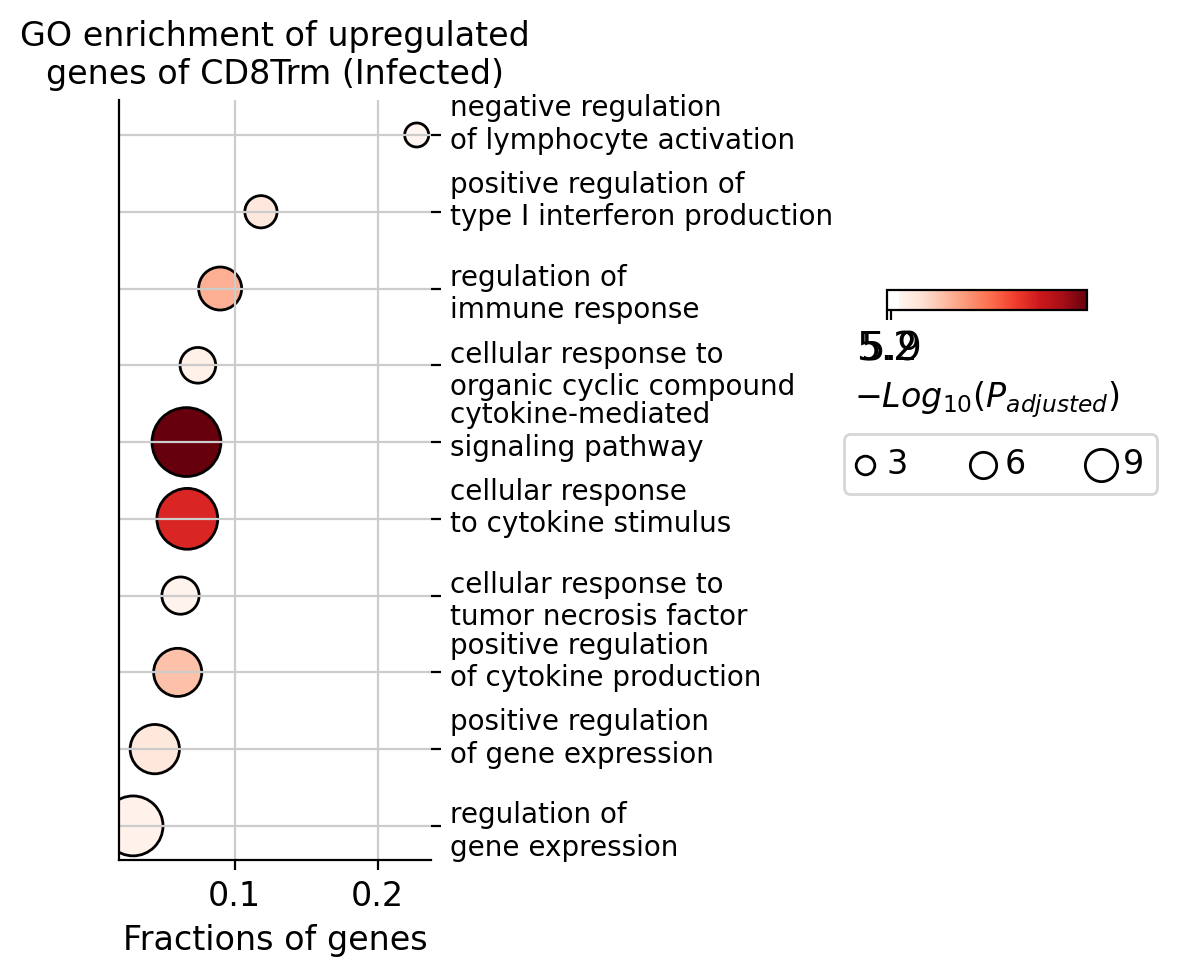

In [53]:
pathway_dict=ov.utils.geneset_prepare('GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0)].index.tolist() #只富集高表达的基因
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ax = ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='GO enrichment of upregulated\ngenes of CD8Trm (Infected)',
                          node_size=[3, 6, 9],
                          cax_loc=[2.10, 0.7, 0.5, 0.02],
                          bbox_to_anchor_used=(-0.3, -10),node_diameter=15,custom_ticks=[5.2,5.9],
                        cmap='Reds')
#plt.savefig('Gastric/Figure/Figure2/Figure2_I',dpi=300,bbox_inches = 'tight')

In [63]:
def insert_newlines(s, n=50):
    if len(s) <= n:
        return s
    parts = s.split(' ')
    new_s = parts[0]
    for part in parts[1:]:
        if len(new_s) - new_s.rfind('\n') + len(part) + 1 > n:
            new_s += '\n' + part
        else:
            new_s += ' ' + part
    return new_s


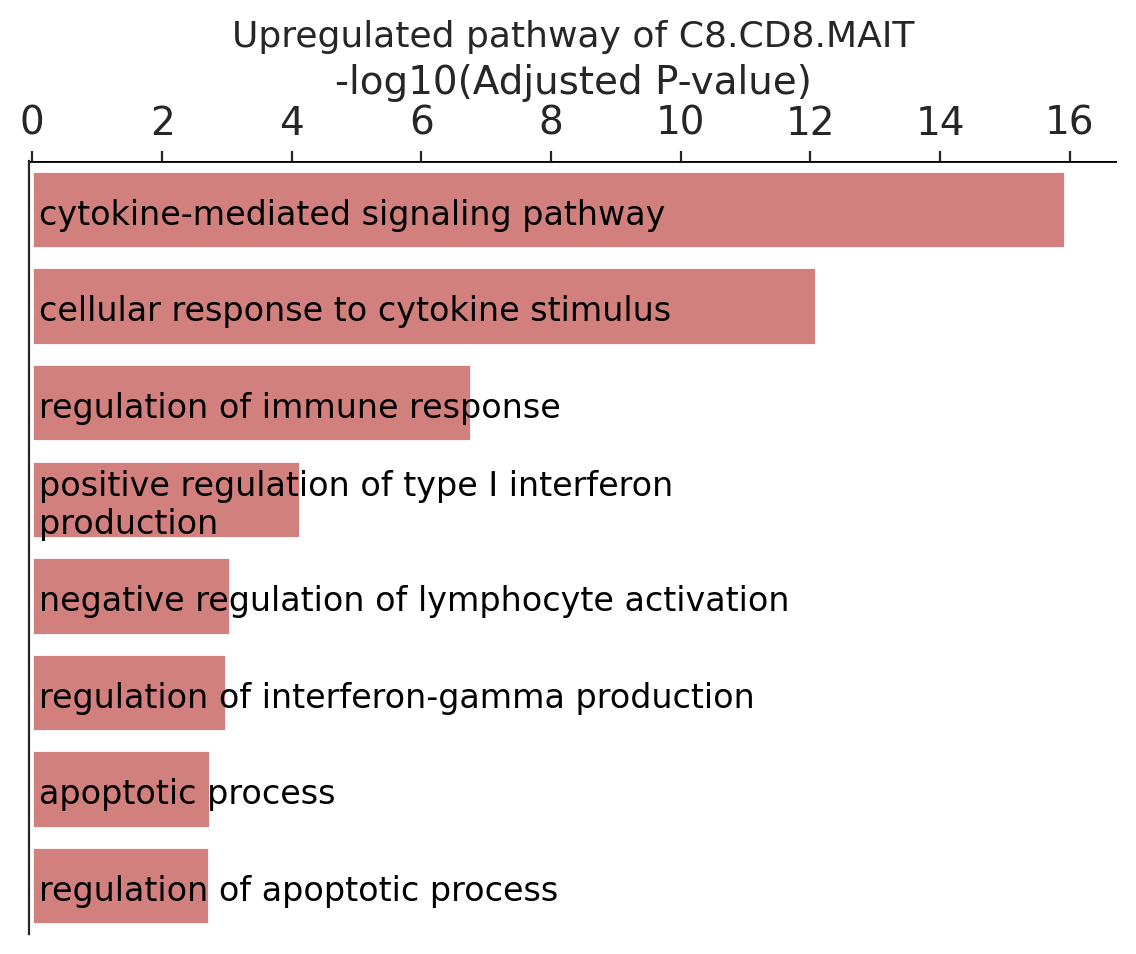

In [65]:

enr_used = enr[enr.loc[:,'Term'].isin(['cytokine-mediated signaling pathway (GO:0019221)','cellular response to cytokine stimulus (GO:0071345)',
                                  'regulation of immune response (GO:0050776)','positive regulation of type I interferon production (GO:0032481)',
                                  'negative regulation of lymphocyte activation (GO:0051250)','apoptotic process (GO:0006915)',
                                  'regulation of apoptotic process (GO:0042981)','regulation of interferon-gamma production (GO:0032649)',
])]
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set_style('white')

enr_used['Term'] = enr_used['Term'].str.replace('\(GO:\d+\)', '', regex=True)
enr_used['-log10(Adjusted P-value)'] = -np.log10(enr_used['Adjusted P-value'])
enr_sorted = enr_used.sort_values('-log10(Adjusted P-value)', ascending=False)

enr_sorted['Term'] = enr_sorted['Term'].apply(insert_newlines)

f, ax = plt.subplots(1, 1, figsize=(6, 5), sharex=True)  
colors = [ov.pl.red_color[1]]*len(enr.index)
barplot = sns.barplot(x="-log10(Adjusted P-value)", y="Term", data=enr_sorted, palette=colors, ax=ax)

sns.set_color_codes("muted")
sns.despine(bottom=True)

for i, p in enumerate(ax.patches):  
    ax.text(p.get_x() + 0.1, p.get_y() + p.get_height() / 2. + 0.05, f'{enr_sorted["Term"].iloc[i]}', fontsize=12,
            ha='left', va='center', color='black')

ax.axhline(y=-0.5, color='black', linewidth=1)

ax.set_ylabel('')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlim(left=-0.05) 
ax.set_title('Upregulated pathway of C8.CD8.MAIT', fontsize=13)
plt.setp(ax.get_yticklabels(), visible=False)
plt.tight_layout(h_pad=2)
plt.savefig("Gastric/Figure/sFigure10/sFigure10_G.png",dpi=300,bbox_inches = 'tight')
plt.show()

In [57]:
enr = enr.sort_values(['Adjusted P-value'],ascending=True)
for i in enr['Term']:
    print(i)
    print(enr.loc[enr['Term']==i,'Adjusted P-value'].values[0])

cytokine-mediated signaling pathway (GO:0019221)
1.1656292128602028e-16
cellular response to cytokine stimulus (GO:0071345)
8.254802729306858e-13
regulation of immune response (GO:0050776)
1.7280874261490906e-07
positive regulation of cytokine production (GO:0001819)
9.116954514745162e-07
positive regulation of gene expression (GO:0010628)
6.140248044626127e-05
positive regulation of type I interferon production (GO:0032481)
7.430967254950102e-05
cellular response to organic cyclic compound (GO:0071407)
0.0003404201659912084
regulation of gene expression (GO:0010468)
0.00048687390576123123
cellular response to tumor necrosis factor (GO:0071356)
0.0005699714797044315
negative regulation of lymphocyte activation (GO:0051250)
0.0008815364423457535
response to sterol (GO:0036314)
0.0009790505165536314
regulation of interferon-gamma production (GO:0032649)
0.0010318735137162557
positive regulation of neuron apoptotic process (GO:0043525)
0.0010741562705457789
cellular response to interferon

In [55]:
help(enr.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'str' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.
    
    Parameters
    ----------
            by : str or list of str
                Name or list of names to sort by.
    
                - if `axis` is 0 or `'index'` then `by` may contain index
                  levels and/or column labels.
                - if `axis` is 1 or `'columns'` then `by` may contain column
                  levels and/or index labels.
    axis : {0 or 'index', 1 or 'columns'}, default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         or